<img src="Capture.PNG"/>

# Load Basic Libraries

In [1]:
#pandas for file processing and converting dataset into dataframe
import pandas as pd

#numpy for linear algebra
import numpy as np

#2 plotting libraries, mathplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#get rid of normal warnings in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

#more librarires
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go


# Reading the csv file

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# Lets look at the top 5 rows
dataset.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

# Exploring the data set in order to derive useful Information

In [4]:
dataset.shape

(299, 13)

this showes iour data set has 299 rows and 13 columns

In [5]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

we can see column names here

In [6]:
dataset.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [7]:
# Checking for null values
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

no null value is here

In [8]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


we notice that the dataset has no null values. this saved us from conveting the null values into some data or dropping then altogether

# Finding the correlation among the attributes

### Correlation Map (heatmap)

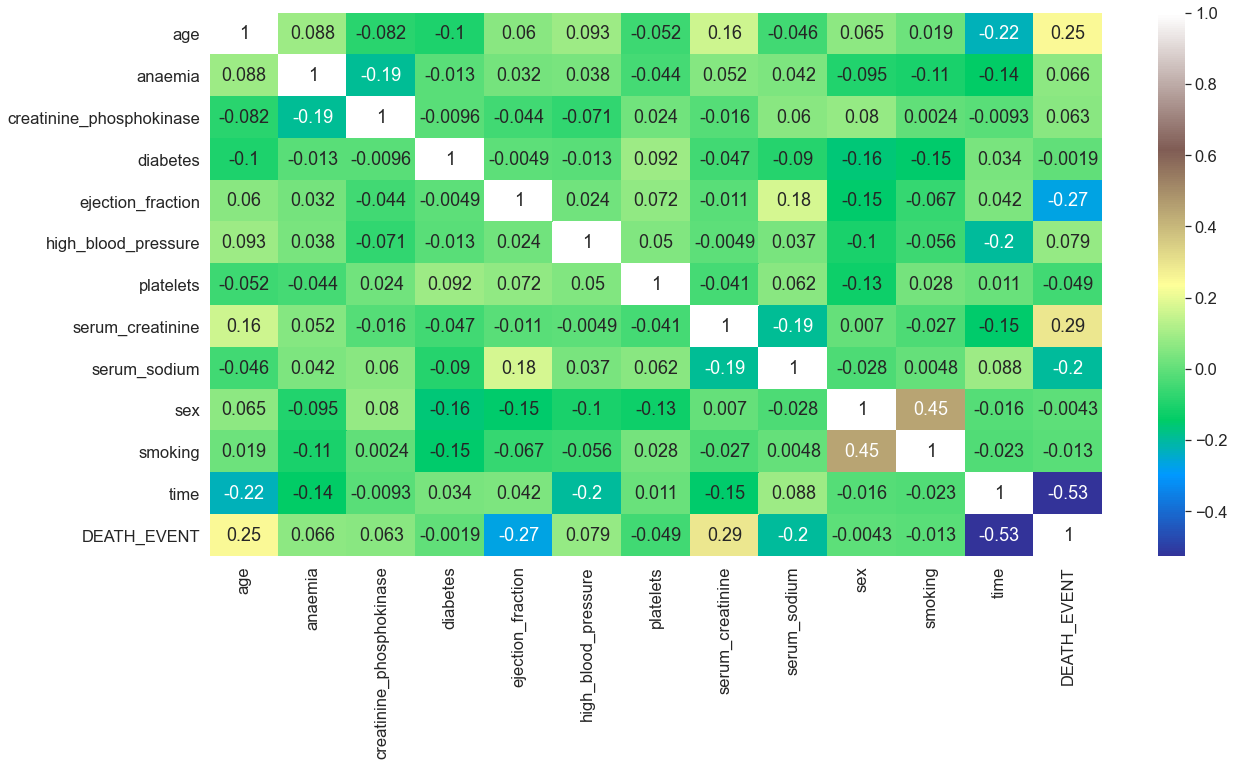

In [9]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(), annot=True, cmap='terrain')

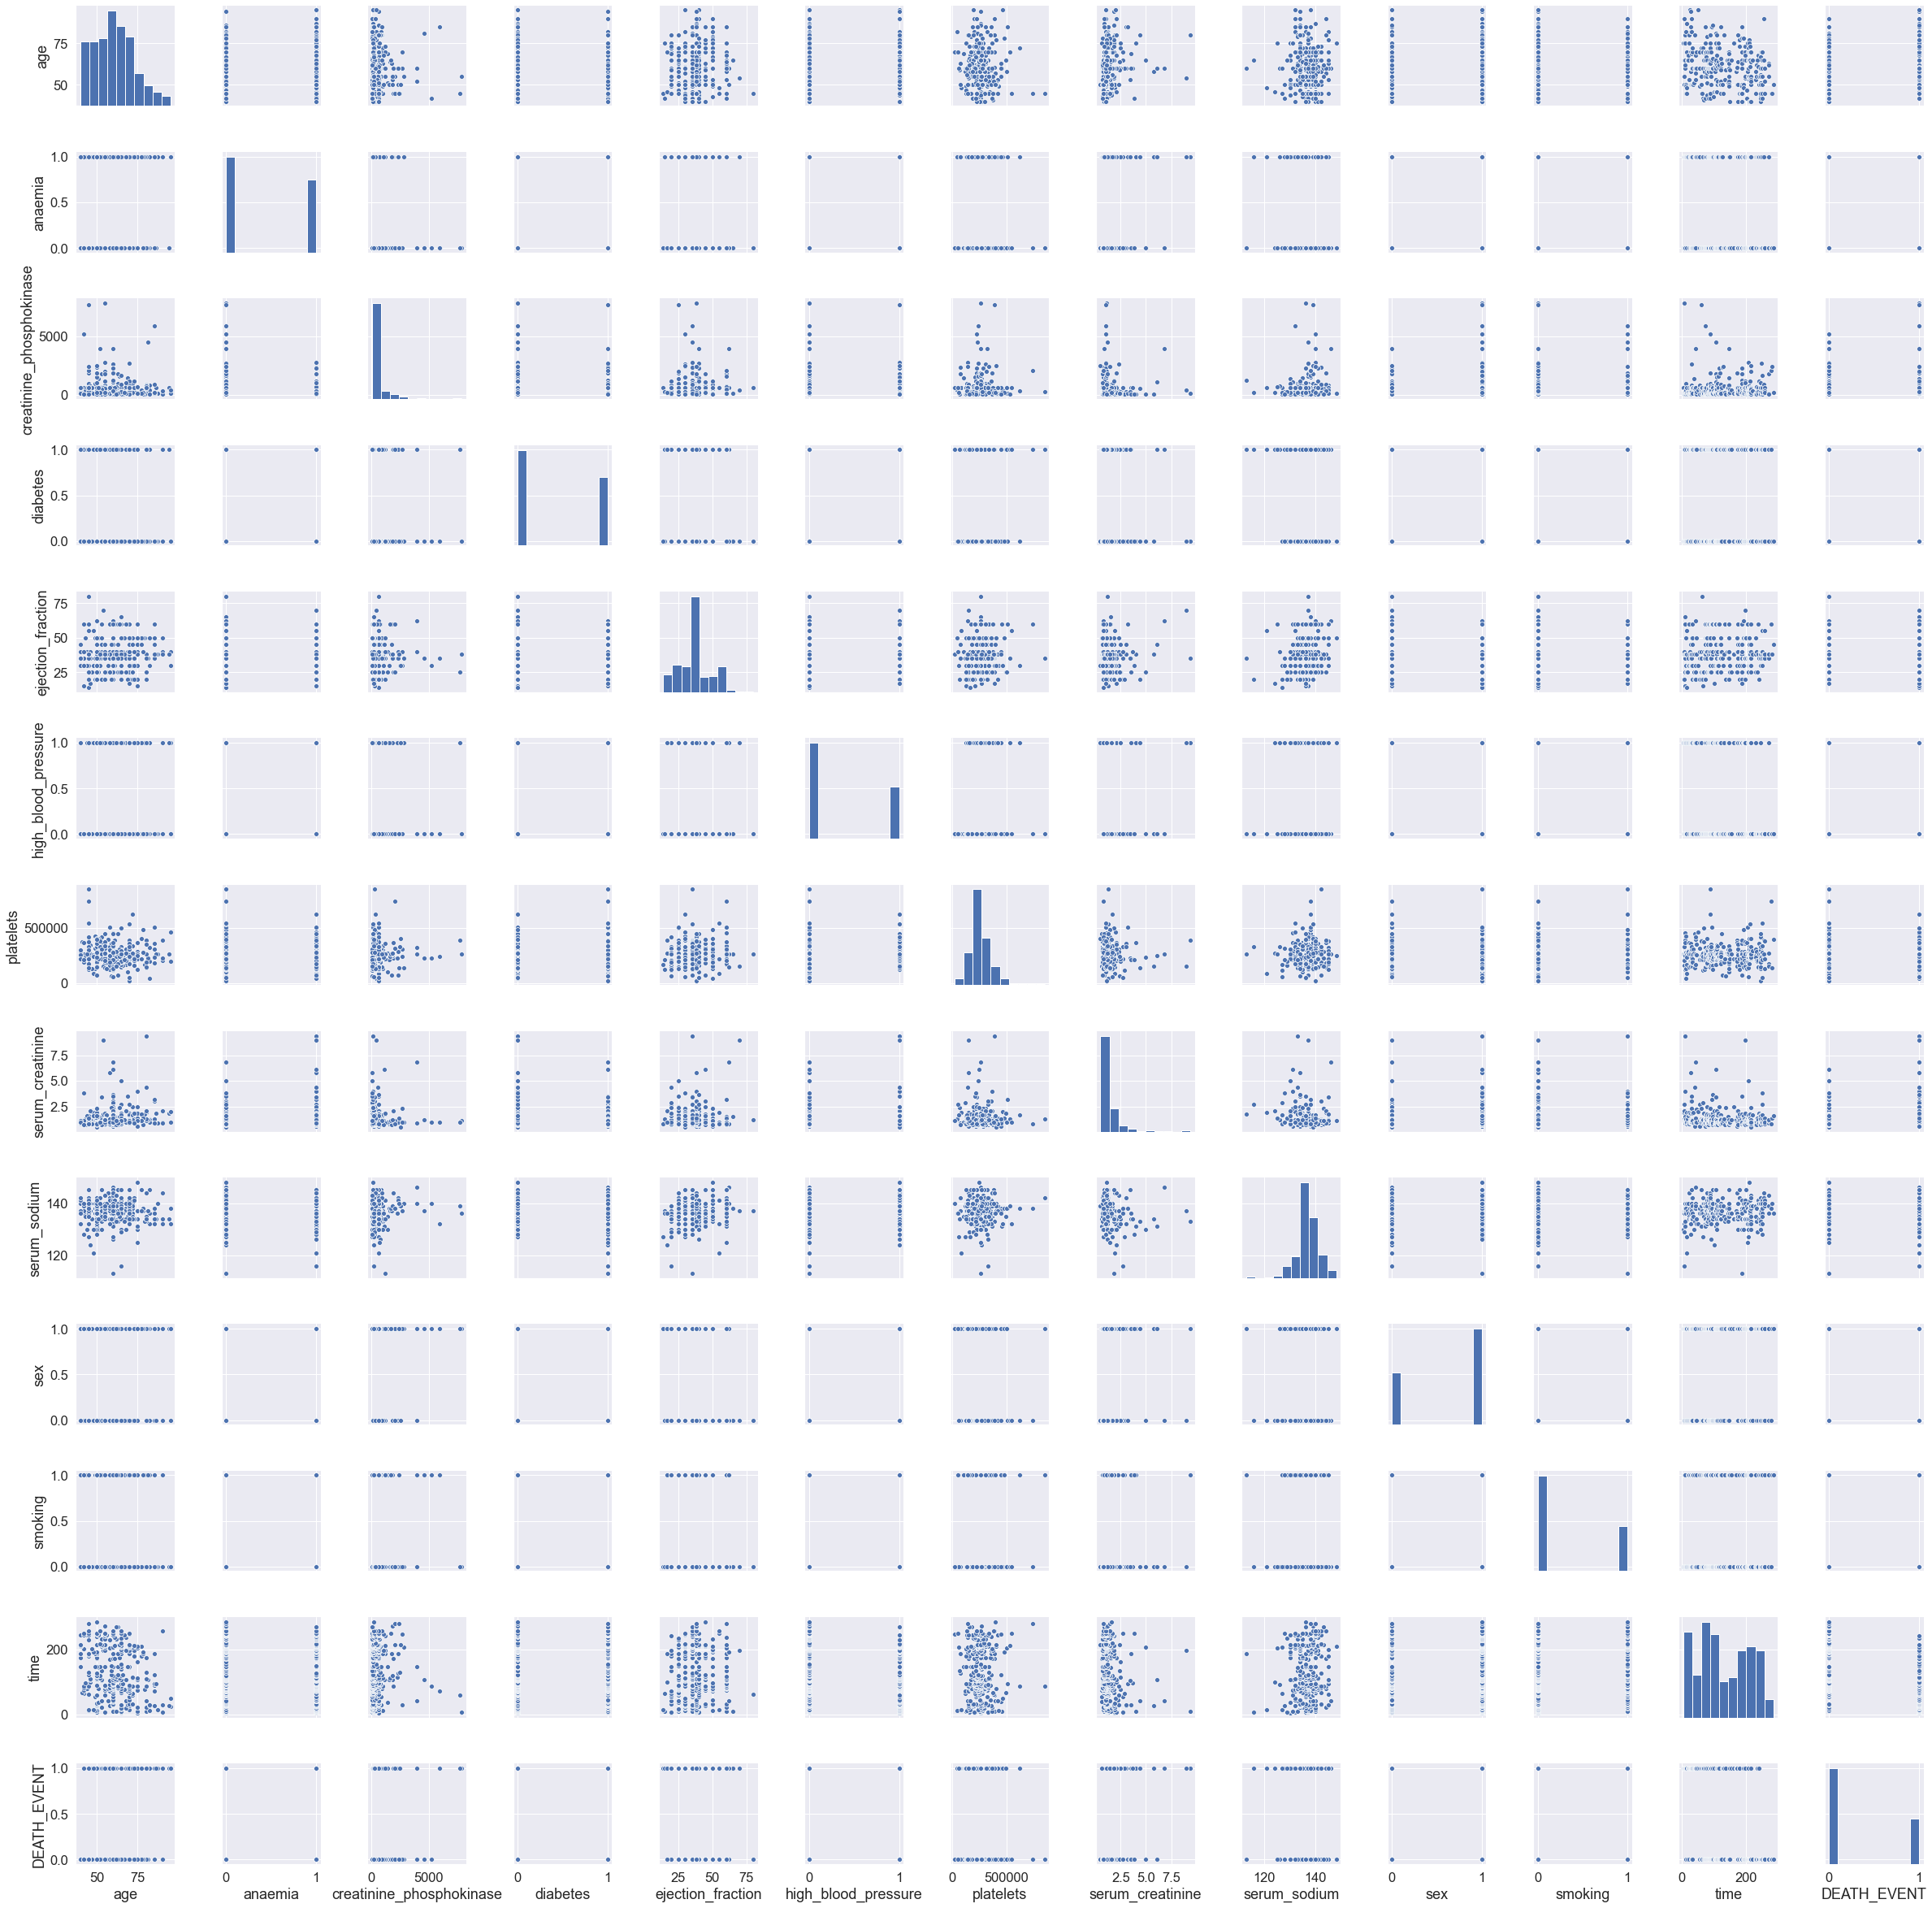

In [10]:
sns.pairplot(data=dataset)

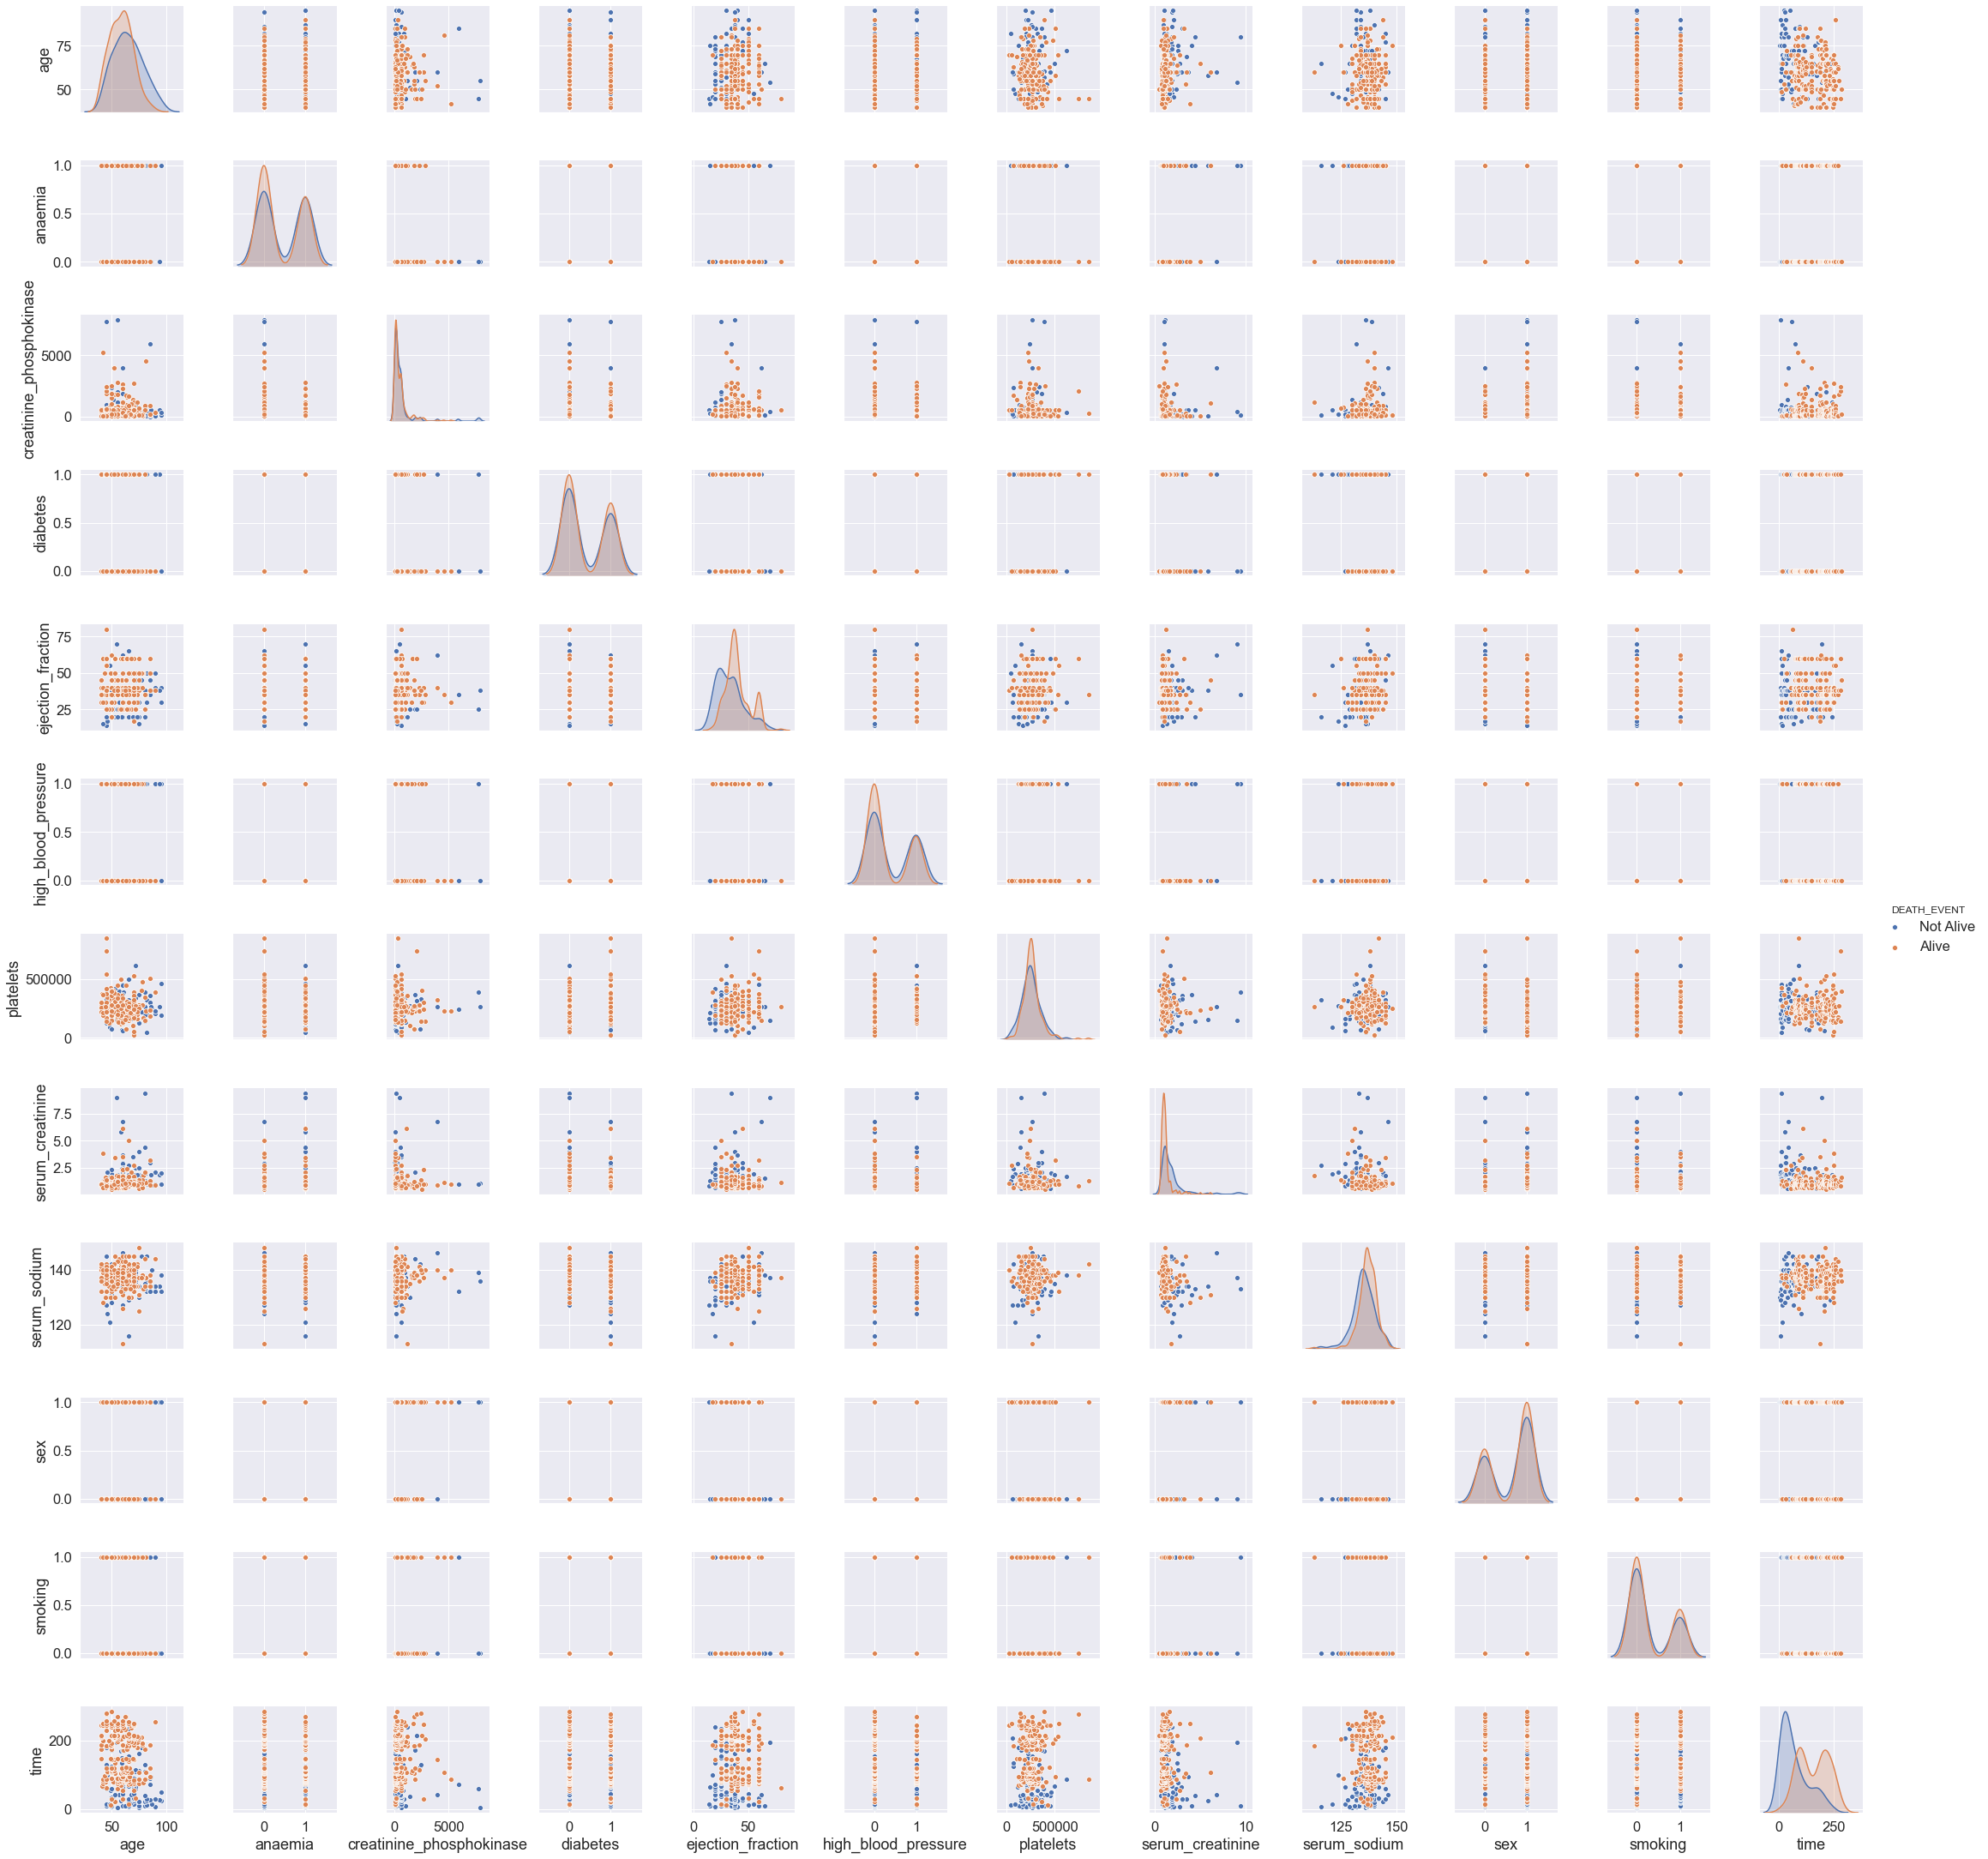

In [11]:
data = dataset.copy()
data.loc[data.DEATH_EVENT == 0, 'DEATH_EVENT'] = "Alive"
data.loc[data.DEATH_EVENT == 1, 'DEATH_EVENT'] = "Not Alive"
sns.pairplot(data=data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']], hue='DEATH_EVENT');

# Explore the data

Sex - Gender of patient Male = 1, Female =0

Age - Age of patient

Diabetes - 0 = No, 1 = Yes

Anaemia - 0 = No, 1 = Yes

High_blood_pressure - 0 = No, 1 = Yes

Smoking - 0 = No, 1 = Yes

DEATH_EVENT - 0 = No, 1 = Yes

# Age factor Analysis

In [12]:
# age distribution

hist_data =[dataset["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels,bin_size=0.5)
fig.update_layout(title_text='Age Distribution plot')
fig.show()

Age wise 40 to 80 the spread is High

less than 40 age and higher than 80 age people are very low

In [13]:
fig = px.box(dataset, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [14]:
male = dataset[dataset["sex"]==1]
female = dataset[dataset["sex"]==0]

male_survi = male[dataset["DEATH_EVENT"]==0]
male_not = male[dataset["DEATH_EVENT"]==1]
female_survi = female[dataset["DEATH_EVENT"]==0]
female_not = female[dataset["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[dataset["DEATH_EVENT"]==0]),len(male[dataset["DEATH_EVENT"]==1]),
         len(female[dataset["DEATH_EVENT"]==0]),len(female[dataset["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

# Gender factor Analysis

In [15]:
surv = dataset[dataset["DEATH_EVENT"]==0]["age"]
not_surv = dataset[dataset["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

Survival is high on 40 to 70

The spread of Not survival is going through all ages.

In [16]:
fig = px.violin(dataset, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=dataset.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

Survival spread is high in age's flow of 40 to 70

The Survival is high for both male between 50 to 60 and female's age between 60 to 70 respectively

# Other Factors

Histogram plots

In [17]:
fig = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig.show()

In [18]:
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig.show()

In [19]:
fig = px.histogram(dataset, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig.show()

In [20]:
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig.show()

In [21]:
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=dataset.columns)
fig.show()

Distribution plots Survived and Not-Survived

In [22]:
surv = dataset[dataset['DEATH_EVENT']==0]['serum_sodium']
not_surv = dataset[dataset['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

In [23]:
surv = dataset[dataset['DEATH_EVENT']==0]['serum_creatinine']
not_surv = dataset[dataset['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status")
fig.show()

In [24]:
surv = dataset[dataset['DEATH_EVENT']==0]['ejection_fraction']
not_surv = dataset[dataset['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Ejaction Fraction on Survival Status")
fig.show()

Pie Charts

In [25]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = dataset[dataset['diabetes']==1]
diabetes_no = dataset[dataset['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

From the above pie chart we can conclude that in our dataset 58.2% (174) pepole are No Diabetes Person and 41.8% (125) are Diabetes Person.

In [26]:
fig = px.pie(dataset, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio')
fig.show()

In [27]:
labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[dataset["DEATH_EVENT"]==0]),len(diabetes_yes[dataset["DEATH_EVENT"]==1]),
         len(diabetes_no[dataset["DEATH_EVENT"]==0]),len(diabetes_no[dataset["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()

From above pie charts we can conclude that in our dataset diabetes from 174 of Non Diabetes person 118 are survived and 56 are not survived and

From 125 Diabetes person 85 are survived, while 40 are not survived

In [28]:
anaemia_yes = dataset[dataset['anaemia']==1]
anaemia_no = dataset[dataset['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Anaemia")
fig.show()

From the above pie chart we can conclude that in our dataset 56.9%(170) pepoles are Non anaemic pepoles, while 43.1%(129) are anaemic pepoles.

In [29]:
fig = px.pie(dataset, values='anaemia',names='DEATH_EVENT', title='Anaemia Death Event Ration')
fig.show()

In [30]:
anaemia_yes_survi = anaemia_yes[dataset["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[dataset["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[dataset["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[dataset["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[dataset["DEATH_EVENT"]==0]),len(anaemia_yes[dataset["DEATH_EVENT"]==1]),
         len(anaemia_no[dataset["DEATH_EVENT"]==0]),len(anaemia_no[dataset["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

From above pie charts we can conclude that in our dataset diabetes from 170 of Non Anaemic person 120 are survived and 50 are not survived and

From 129 Anaemic person 83 are survived, while 46 are not survived.

In [31]:
hbp_yes = dataset[dataset['high_blood_pressure']==1]
hbp_no = dataset[dataset['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()

From the above pie chart we can conclude that in our dataset 64.9%(194) pepoles are Non High BP pepoles, while 35.1%(105) are High BP pepoles.

In [32]:
fig = px.pie(dataset, values='high_blood_pressure',names='DEATH_EVENT', title='High Blood Pressure Death Event Ratio')
fig.show()

In [33]:
hbp_yes_survi = hbp_yes[dataset["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[dataset["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[dataset["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[dataset["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[dataset["DEATH_EVENT"]==0]),len(hbp_yes[dataset["DEATH_EVENT"]==1]),
         len(hbp_no[dataset["DEATH_EVENT"]==0]),len(hbp_no[dataset["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()

From above pie charts we can conclude that in our dataset diabetes from 194 of Non High BP person 137 are survived and 57 are not survived and

From 105 High BP person 66 are survived, while 39 are not survived.

In [34]:
smoking_yes = dataset[dataset['smoking']==1]
smoking_no = dataset[dataset['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

From the above pie chart we can conclude that in our dataset 67.9%(203) pepoles are Non Smoking pepoles, while 32.1%(96) are Smoking pepoles.

In [35]:
fig = px.pie(dataset, values='smoking',names='DEATH_EVENT', title='Smoking Death Event Ratio')
fig.show()


In [36]:
smoking_yes_survi = smoking_yes[dataset["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[dataset["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[dataset["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[dataset["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[dataset["DEATH_EVENT"]==0]),len(smoking_yes[dataset["DEATH_EVENT"]==1]),
         len(smoking_no[dataset["DEATH_EVENT"]==0]),len(smoking_no[dataset["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

From above pie charts we can conclude that in our dataset diabetes from 203 of Non Smoking person 137 are survived and 66 are not survived and

From 96 Smoking person 66 are survived, while 30 are not survived.

# Data Modeling

[0.09594286 0.02655916 0.07718025 0.02864746 0.13340365 0.02419424
 0.07152057 0.11487576 0.08553428 0.02578567 0.02608237 0.29027375]


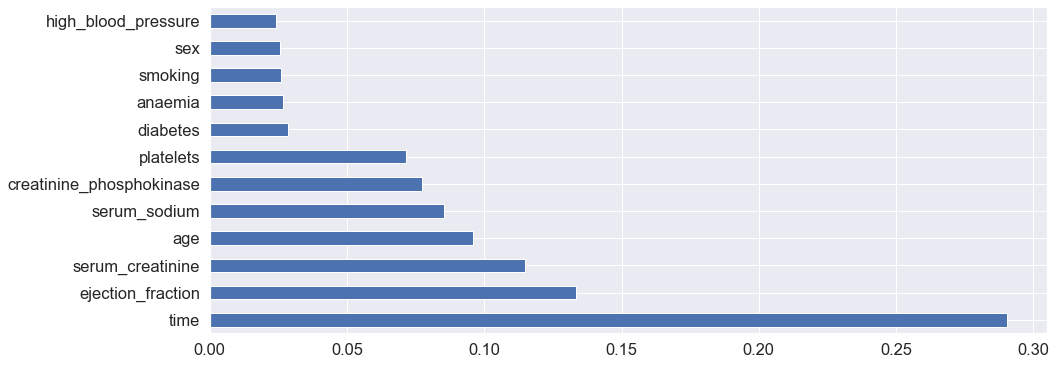

In [37]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set(font_scale=1.5)
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Finding outliers

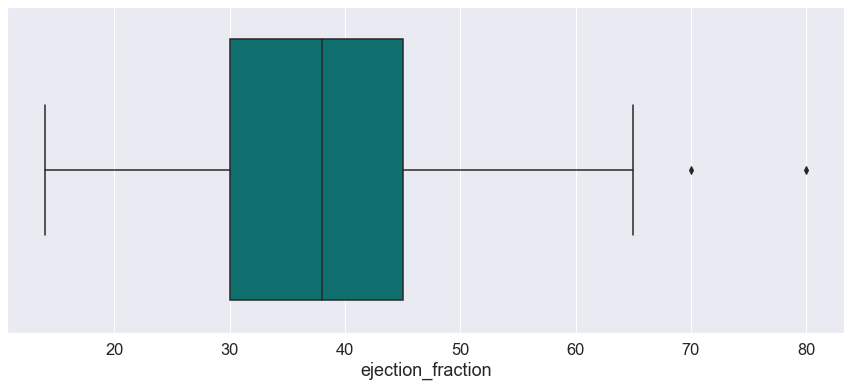

In [38]:
# Boxplot for ejection_fraction

sns.set(font_scale=1.5)
sns.boxplot(x = dataset.ejection_fraction, color = 'teal')
plt.show()

We can see there are two outliers. Lets remove them

In [39]:
dataset[dataset['ejection_fraction']>=70]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
64   45.0        0                       582         0                 80   
217  54.0        1                       427         0                 70   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
64                     0  263358.03              1.18           137    0   
217                    1  151000.00              9.00           137    0   

     smoking  time  DEATH_EVENT  
64         0    63            0  
217        0   196            1

In [40]:
dataset = dataset[dataset['ejection_fraction']<70]

Finding outliers in time

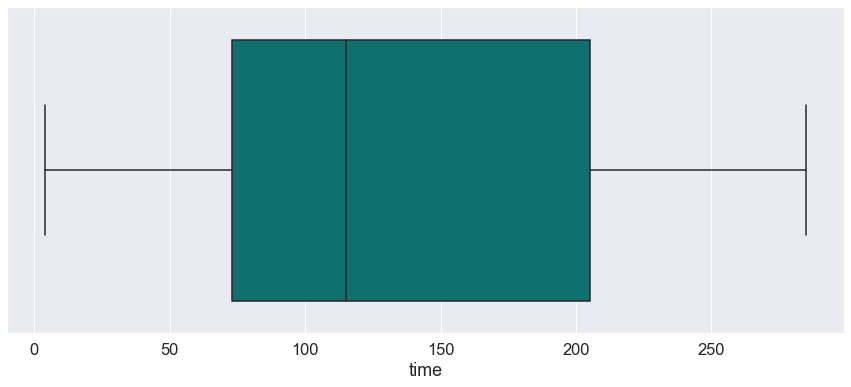

In [41]:
sns.set(font_scale=1.5)
sns.boxplot(x=dataset.time, color = 'teal')
plt.show()

No outliers in time.

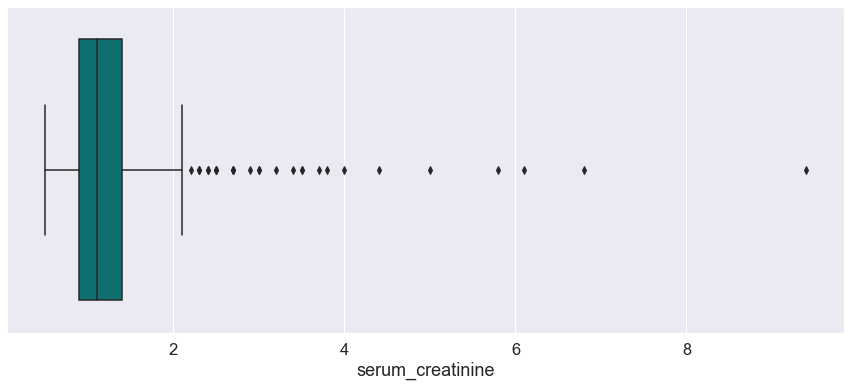

In [42]:
# Boxplot for ejection_fraction

sns.set(font_scale=1.5)
sns.boxplot(x=dataset.serum_creatinine, color = 'teal')
plt.show()

In [43]:
x = dataset.iloc[:, [4,7,11]].values
y = dataset.iloc[:,-1].values

In [44]:
print(x)

[[ 20.     1.9    4.  ]
 [ 38.     1.1    6.  ]
 [ 20.     1.3    7.  ]
 [ 20.     1.9    7.  ]
 [ 20.     2.7    8.  ]
 [ 40.     2.1    8.  ]
 [ 15.     1.2   10.  ]
 [ 60.     1.1   10.  ]
 [ 65.     1.5   10.  ]
 [ 35.     9.4   10.  ]
 [ 38.     4.    10.  ]
 [ 25.     0.9   10.  ]
 [ 30.     1.1   11.  ]
 [ 38.     1.1   11.  ]
 [ 30.     1.    12.  ]
 [ 50.     1.3   13.  ]
 [ 38.     0.9   14.  ]
 [ 14.     0.8   14.  ]
 [ 25.     1.    15.  ]
 [ 55.     1.9   15.  ]
 [ 25.     1.3   16.  ]
 [ 30.     1.6   20.  ]
 [ 35.     0.9   20.  ]
 [ 60.     0.8   22.  ]
 [ 30.     1.83  23.  ]
 [ 38.     1.9   23.  ]
 [ 40.     1.    24.  ]
 [ 45.     1.3   26.  ]
 [ 38.     5.8   26.  ]
 [ 30.     1.2   26.  ]
 [ 38.     1.83  27.  ]
 [ 45.     3.    28.  ]
 [ 35.     1.    28.  ]
 [ 30.     1.2   29.  ]
 [ 50.     1.    29.  ]
 [ 35.     3.5   30.  ]
 [ 50.     1.    30.  ]
 [ 50.     1.    30.  ]
 [ 30.     2.3   30.  ]
 [ 38.     3.    30.  ]
 [ 20.     1.83  31.  ]
 [ 30.     1.2  

In [45]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [46]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [47]:
print(x_train)

[[ 40.     0.8  250.  ]
 [ 25.     2.5   77.  ]
 [ 35.     1.3   88.  ]
 [ 60.     1.   113.  ]
 [ 35.     0.7  197.  ]
 [ 25.     1.3   16.  ]
 [ 25.     0.9   38.  ]
 [ 35.     0.8  120.  ]
 [ 60.     1.4  205.  ]
 [ 35.     1.1  208.  ]
 [ 45.     1.3   26.  ]
 [ 20.     1.83 198.  ]
 [ 25.     0.8  230.  ]
 [ 50.     1.    30.  ]
 [ 25.     1.7   82.  ]
 [ 40.     1.2  121.  ]
 [ 45.     1.    80.  ]
 [ 40.     0.9  244.  ]
 [ 50.     1.3  121.  ]
 [ 35.     1.8  186.  ]
 [ 30.     1.3  212.  ]
 [ 50.     1.1  209.  ]
 [ 40.     1.2   74.  ]
 [ 25.     1.   205.  ]
 [ 40.     1.   140.  ]
 [ 35.     1.   206.  ]
 [ 25.     1.2   85.  ]
 [ 60.     1.1   33.  ]
 [ 35.     1.3  212.  ]
 [ 25.     1.2  154.  ]
 [ 35.     0.8  145.  ]
 [ 40.     1.   147.  ]
 [ 38.     2.2   45.  ]
 [ 60.     0.9  107.  ]
 [ 25.     1.    15.  ]
 [ 45.     0.9  174.  ]
 [ 25.     2.4  214.  ]
 [ 60.     3.2   94.  ]
 [ 38.     1.83  95.  ]
 [ 35.     1.    72.  ]
 [ 35.     1.   108.  ]
 [ 35.     1.1  

In [48]:
print(y_test)

[0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [49]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# K NEAREST NEIGHBOR CLASSIFIER

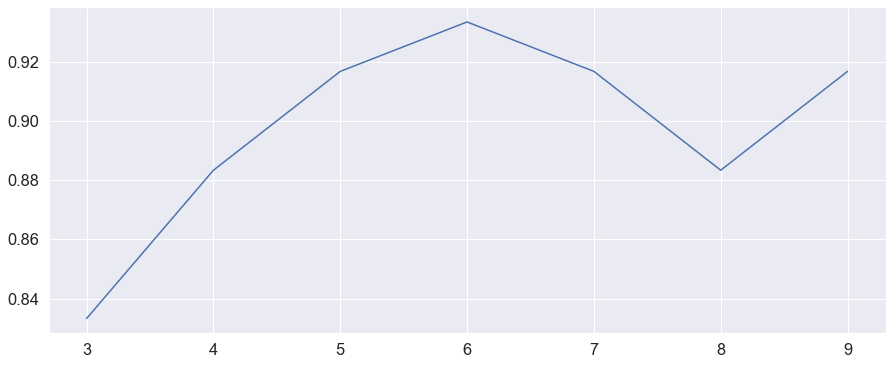

In [50]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
sns.set(font_scale=1.5)
plt.show()

In [51]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [52]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [53]:
# Making the confusion matrix and calculating accuracy score

mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[42  1]
 [ 3 14]]
0.9333333333333333


In [54]:
print("Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100*ac))

Accuracy of K Neighbors Classifier is :  93.33%


### K-NN : 93.33% (accuracy)

# SUPPORT VECTOR CLASSIFIER

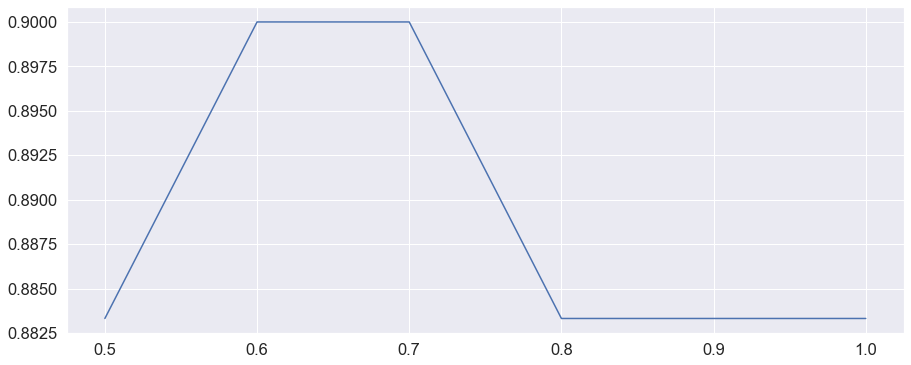

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
sns.set(font_scale=1.5)
plt.show()

In [56]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.6, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.6, random_state=0)

In [57]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0]


In [58]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[40  3]
 [ 3 14]]
0.9


In [59]:
print("Accuracy of SUPPORT VECTOR Classifier is : ", "{:.2f}%".format(100*ac))

Accuracy of SUPPORT VECTOR Classifier is :  90.00%


### SVM : 90.00% (accuracy)

<img src="Capture.PNG"/>

# DECISION TREE CLASSIFIER

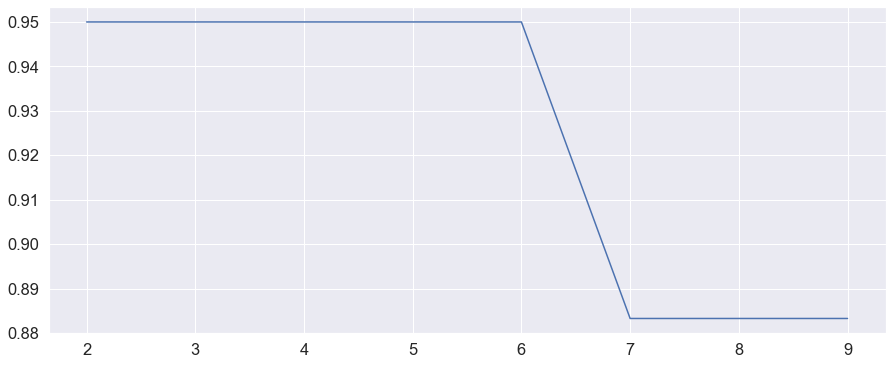

In [60]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
sns.set(font_scale=1.5)
plt.show()

In [61]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [62]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [63]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[43  0]
 [ 3 14]]
0.95


In [64]:
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100*ac))

Accuracy of Decision Tree Classifier is :  95.00%


### DT : 95.00% (accuracy)